<a href="https://www.kaggle.com/code/robertmounce/my-own-spotify-wrap?scriptVersionId=189022138" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/music-data/StreamingHistory_music_1.json
/kaggle/input/music-data/Marquee.json
/kaggle/input/music-data/StreamingHistory_music_3.json
/kaggle/input/music-data/StreamingHistory_music_2.json
/kaggle/input/music-data/StreamingHistory_music_0.json


# Overview
## Insightful into my own patterns listening to music 


# Step 1 Import

In [59]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 EDA

In [60]:
# upload spotify marquee json files
files = '/kaggle/input/music-data/Marquee.json'
with open(files,'r') as file:
        data= json.load(file)
df = pd.json_normalize(data)

# upload listening history json files
file_paths =['/kaggle/input/music-data/StreamingHistory_music_0.json',
'/kaggle/input/music-data/StreamingHistory_music_1.json',
'/kaggle/input/music-data/StreamingHistory_music_2.json',
'/kaggle/input/music-data/StreamingHistory_music_3.json']
df_list =[]
for file_path in file_paths:
    with open(file_path, 'r') as file:
        data = json.load(file)
        df_list.append(pd.DataFrame(data))

In [61]:
df.head()

,artistName,segment
0,AJ Tracey,Light listeners
1,Masego,Previously Active Listeners
2,Joy Division,Previously Active Listeners
3,Sammy Johnson,Previously Active Listeners
4,John Barry,Previously Active Listeners


In [62]:
df.describe()

,artistName,segment
count,1365,1365
unique,1364,4
top,Dahi,Previously Active Listeners
freq,2,1146


In [63]:
df.dropna(subset=['artistName','segment'], inplace = True)
#Example: Standardize text to lower case
df['artistName'] = df['artistName'].str.lower()

In [64]:
segment_counts = df.groupby('segment')['artistName'].nunique()
print(segment_counts)

segment
Light listeners                 160
Moderate listeners               53
Previously Active Listeners    1146
Super Listeners                   6
Name: artistName, dtype: int64


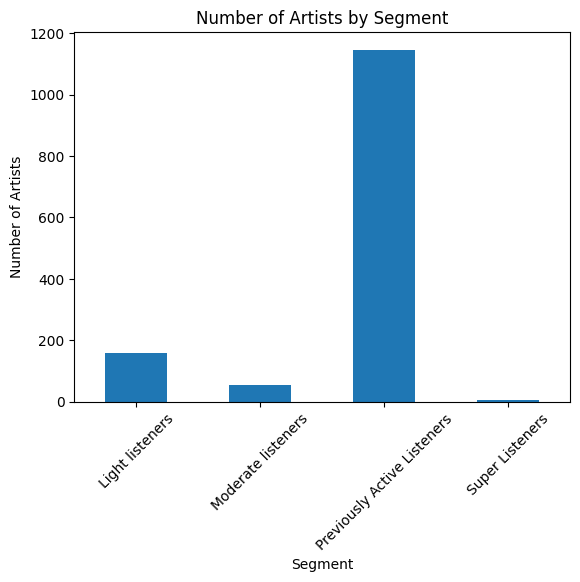

In [65]:
segment_counts.plot(kind='bar')
plt.title('Number of Artists by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Artists')
plt.xticks(rotation =45)
plt.show()

In [66]:
super_listeners_df =df[df['segment'] == 'Super Listeners']
print(super_listeners_df)

          artistName          segment
116              bas  Super Listeners
337              ilu  Super Listeners
509     brent faiyaz  Super Listeners
780   kendrick lamar  Super Listeners
832          j. cole  Super Listeners
1231           jay-z  Super Listeners


## Listening History
### Dataset Information
columns inclde the endtime including the date, the artname and trackname and ms played. 
### Cleaning tasks
- convert ms into minutes 
- count the tracks by the artists


In [67]:
streaming_history_df =pd.concat(df_list, ignore_index=True)
# Cleaning
streaming_history_df['endTime'] =pd.to_datetime(streaming_history_df['endTime'])
# Converting milliseconds column Msplayed to mintues by dividing by 60000 (ms per minute)
streaming_history_df['minutesPlayed'] = streaming_history_df['msPlayed']/ 60000


In [102]:
streaming_history_df.describe()

,msPlayed,minutesPlayed,day_of_week,hour
count,3.242600e+04,32426.000000,32426.000000,32426.000000
mean,1.095882e+05,1.826471,3.030593,13.354006
std,1.013761e+05,1.689601,1.924253,7.668818
min,0.000000e+00,0.000000,0.000000,0.000000
25%,7.128000e+03,0.118800,1.000000,6.000000
50%,9.824900e+04,1.637483,3.000000,16.000000
75%,1.889908e+05,3.149846,5.000000,20.000000
max,1.716745e+06,28.612417,6.000000,23.000000


In [ ]:
streaming_history_df

In [68]:
streaming_history_df.head()

,endTime,artistName,trackName,msPlayed,minutesPlayed
0,2023-04-01 00:00:00,Brent Faiyaz,"GRAVITY (FEAT. TYLER, THE CREATOR)",2043,0.034050
1,2023-04-01 00:00:00,Joey Bada$$,Head High,8498,0.141633
2,2023-04-01 00:00:00,"Tyler, The Creator",Potato Salad,118750,1.979167
3,2023-04-01 00:03:00,"Tyler, The Creator",STUNTMAN (feat. Vince Staples),188197,3.136617
4,2023-04-01 00:04:00,"Tyler, The Creator","BOYFRIEND, GIRLFRIEND (2020 Demo) (feat. YG)",33459,0.557650


In [69]:
total_minutes_played = streaming_history_df['minutesPlayed'].sum()
print(f"Total minutes played: {total_minutes_played:.2f}")

Total minutes played: 59225.14


In [70]:
top_artists =streaming_history_df.groupby('artistName')['minutesPlayed'].sum().sort_values(ascending=False).head(10)
print(top_artists)

artistName
Drake                 2768.257017
Brent Faiyaz          2462.545400
Cleo Sol              1558.976933
Kendrick Lamar        1263.884867
J. Cole               1065.585850
Nas                    895.752750
Khamari                866.676933
Tyler, The Creator     827.715317
JAY-Z                  790.697900
Thee Sacred Souls      785.724617
Name: minutesPlayed, dtype: float64


## Listening Time Over Time

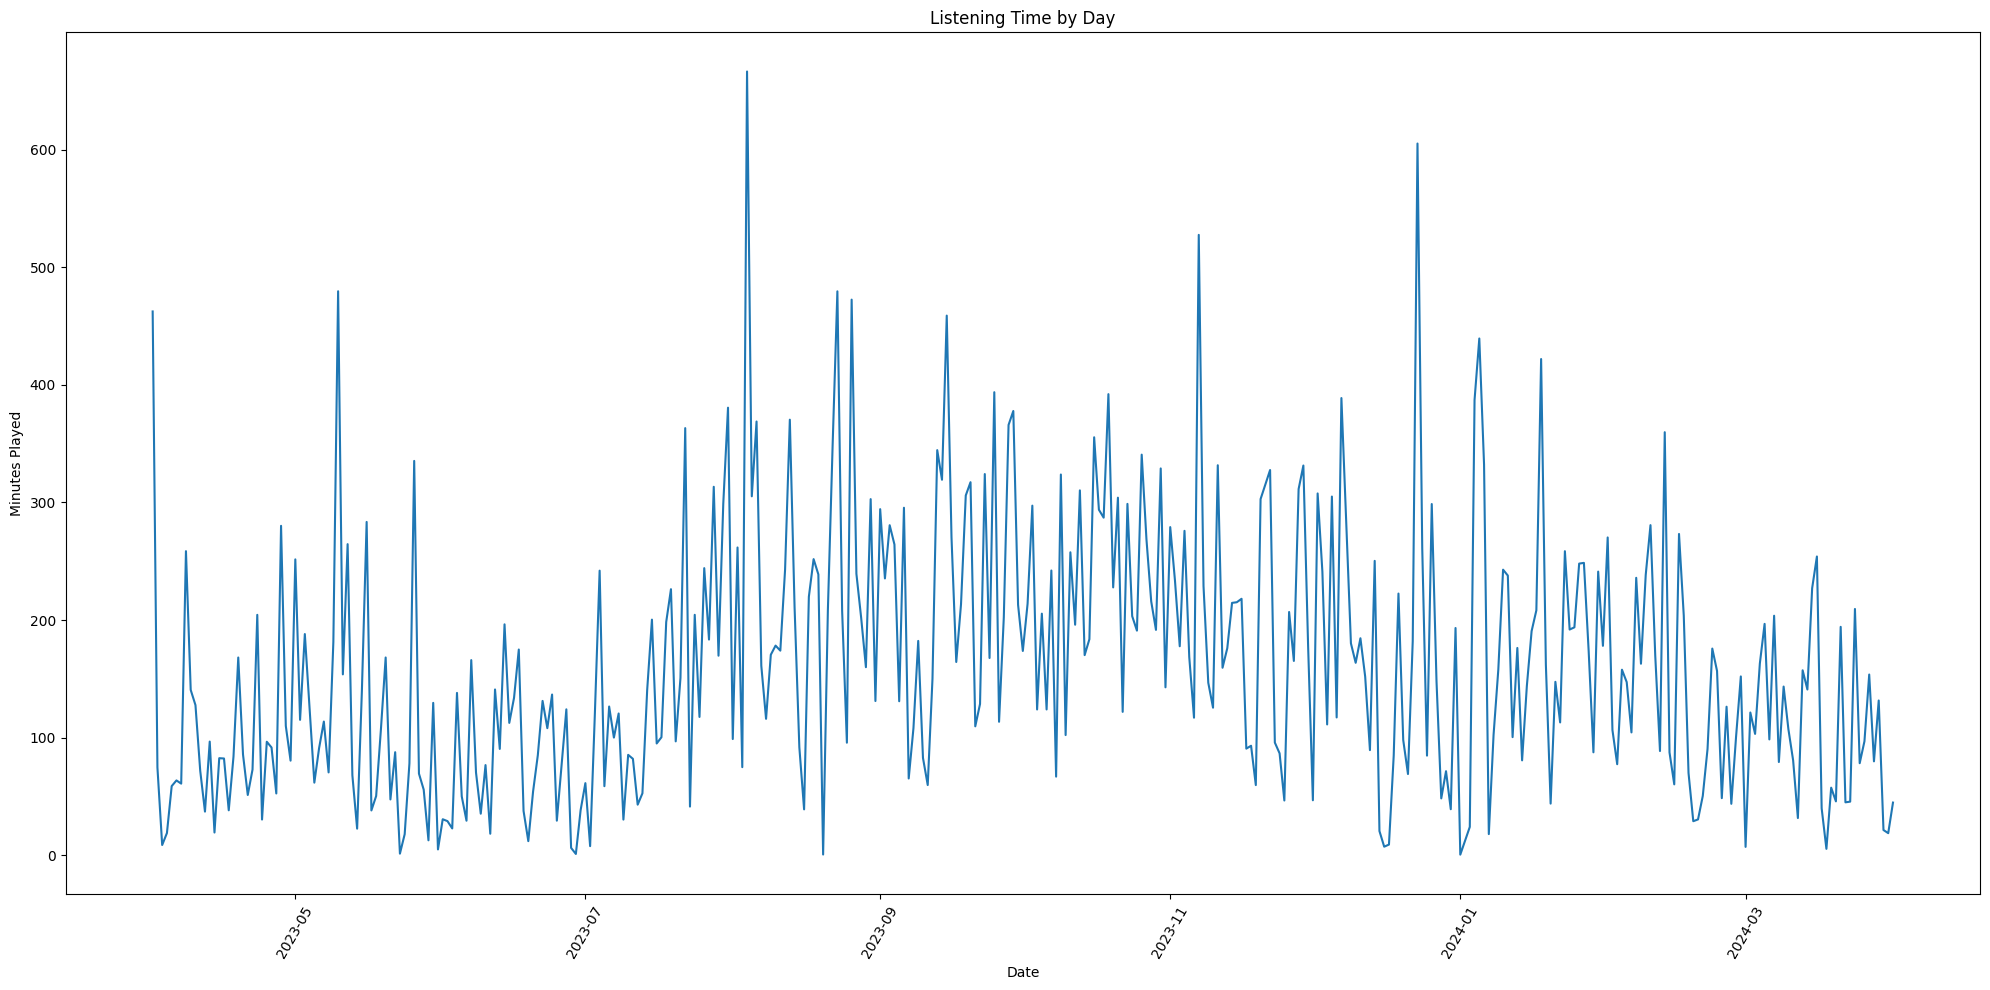

In [71]:
# Aggregate listening time by day
listening_by_day = streaming_history_df.groupby(streaming_history_df['endTime'].dt.date)['minutesPlayed'].sum()

# Plot
listening_by_day.plot(kind='line', figsize=(20, 10))
plt.title('Listening Time by Day')
plt.xlabel('Date')
plt.ylabel('Minutes Played')
plt.xticks(rotation=60)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()


In [91]:
streaming_history_df.describe()

,msPlayed,minutesPlayed,day_of_week,hour
count,3.242600e+04,32426.000000,32426.000000,32426.000000
mean,1.095882e+05,1.826471,3.030593,13.354006
std,1.013761e+05,1.689601,1.924253,7.668818
min,0.000000e+00,0.000000,0.000000,0.000000
25%,7.128000e+03,0.118800,1.000000,6.000000
50%,9.824900e+04,1.637483,3.000000,16.000000
75%,1.889908e+05,3.149846,5.000000,20.000000
max,1.716745e+06,28.612417,6.000000,23.000000


## What am I mostly a fan of?

## Combinding dataframes

In [94]:
# Merging on 'artistName' to add 'segment' to the streaming history
merged_df = pd.merge(streaming_history_df, df, on='artistName', how='left')


In [95]:
# Aggregating minutes played by segment
segment_listen_minutes = merged_df.groupby('segment')['minutesPlayed'].sum().reset_index() 
# Sorting to find the top segments
segment_listen_minutes = segment_listen_minutes.sort_values(by='minutesPlayed', ascending=False)
segment_listen_minutes.head()

,segment,minutesPlayed
2,Previously Active Listeners,507.368933
1,Moderate listeners,314.473300
0,Light listeners,51.128700


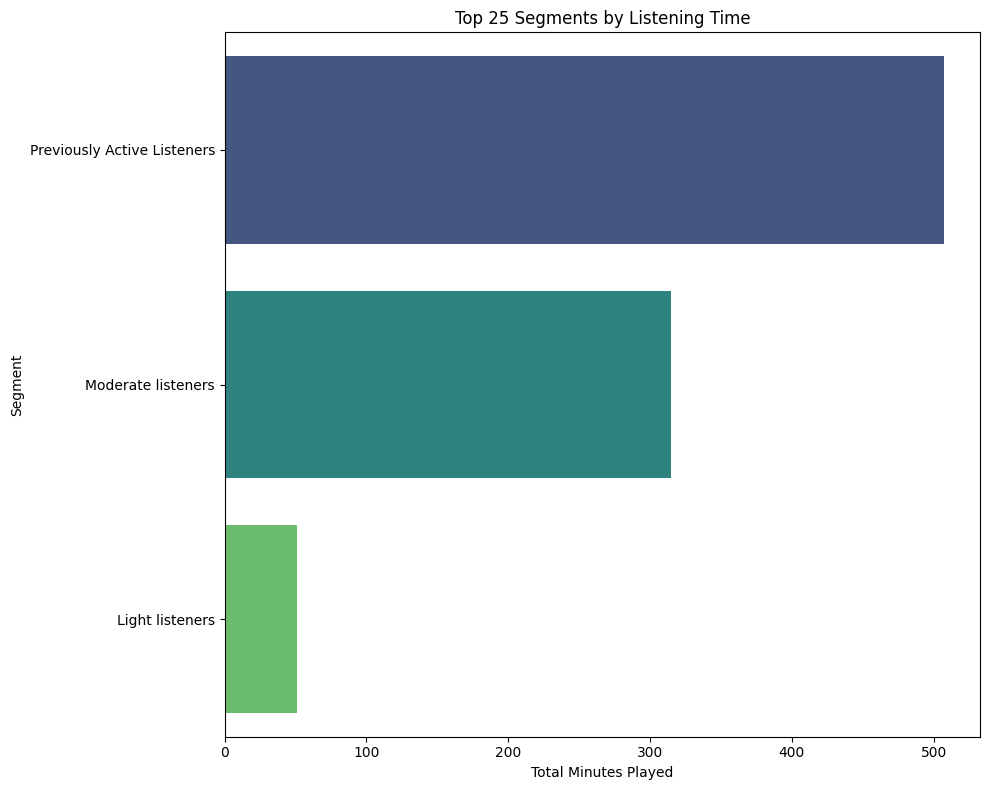

In [76]:
# Limiting to the top 25 segments
top_25_segments = segment_listen_minutes.head(25)

plt.figure(figsize=(10, 8))
sns.barplot(x='minutesPlayed', y='segment', data=top_25_segments, palette='viridis')
plt.title('Top 25 Segments by Listening Time')
plt.xlabel('Total Minutes Played')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

In [96]:
# Assuming 'merged_df' is your DataFrame after merging streaming history with segment information
previously_active = merged_df[merged_df['segment'] == 'Previously Active Listeners']

# Aggregating minutes listened for each artist in the segment
artist_listen_minutes = previously_active.groupby('artistName')['minutesPlayed'].sum().reset_index()


## What did I used to listen to a lot?
### Previous active Listener
- d4vd
- redveil

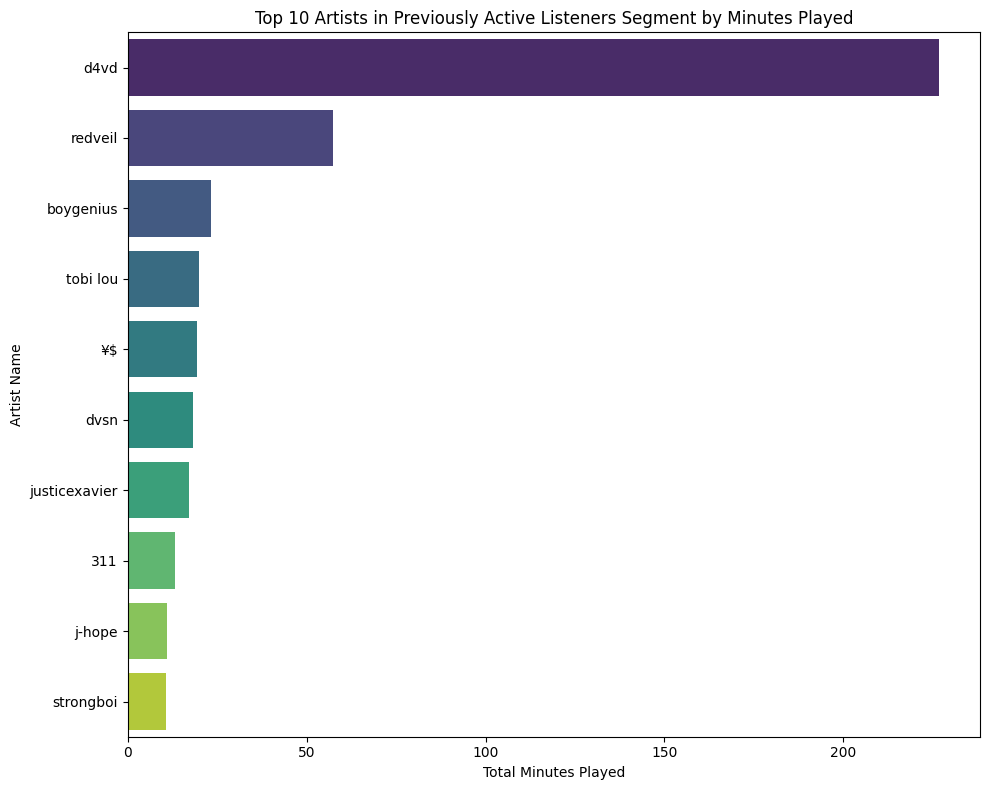

In [103]:
# Top 10 Previous Active Listener
T10PAL = artist_listen_minutes_sorted.head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x='minutesPlayed', y='artistName', data=T10PAL, palette='viridis')
plt.title('Top 10 Artists in Previously Active Listeners Segment by Minutes Played')
plt.xlabel('Total Minutes Played')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()


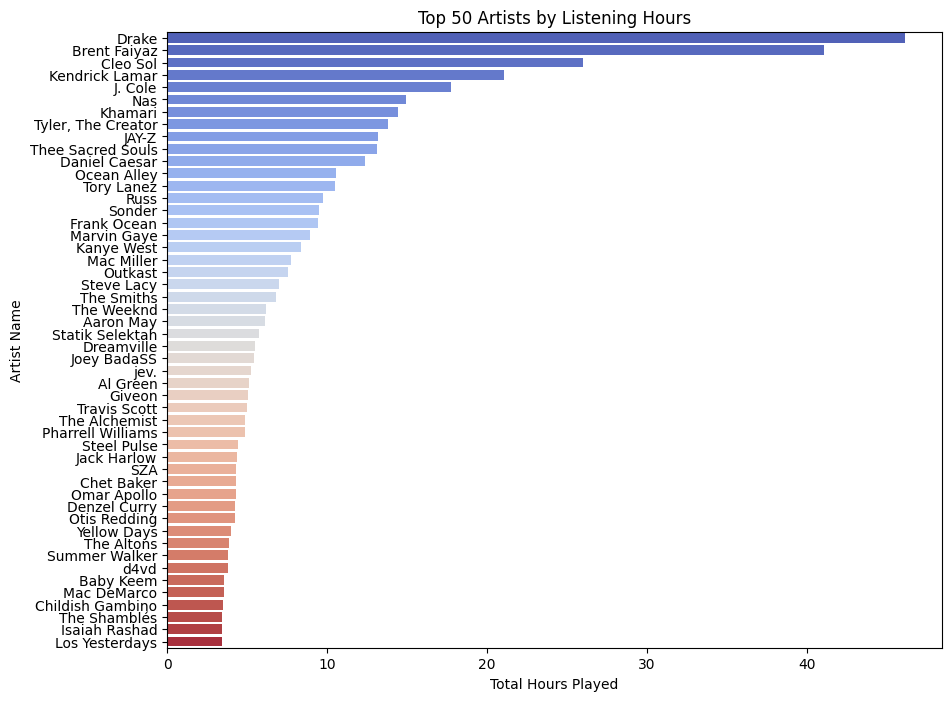

In [111]:
# Group by artist and sum the minutes played
artist_listen_minutes = merged_df.groupby('artistName')['minutesPlayed'].sum().reset_index()

# Convert minutesPlayed to hours
artist_listen_minutes['hoursPlayed'] = artist_listen_minutes['minutesPlayed'] / 60

# Get the top 50 artists by listening hours
top_50_artists = artist_listen_minutes.sort_values(by='hoursPlayed', ascending=False).head(50)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='hoursPlayed', y='artistName', data=top_50_artists, palette='coolwarm')
plt.title('Top 50 Artists by Listening Hours')
plt.xlabel('Total Hours Played')
plt.ylabel('Artist Name')
plt.show()

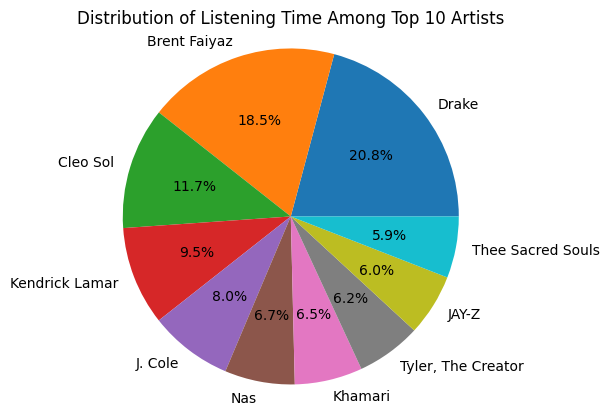

In [85]:
top_artists = artist_listen_minutes.sort_values('minutesPlayed', ascending=False).head(10)
plt.pie(top_artists['minutesPlayed'], labels=top_artists['artistName'], autopct='%1.1f%%')
plt.title('Distribution of Listening Time Among Top 10 Artists')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


## Streaming History dataframe Monthly Listening Time

/tmp/ipykernel_33/3747604830.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  streaming_history_df.resample('M')['minutesPlayed'].sum().plot(title='Monthly Listening Time')


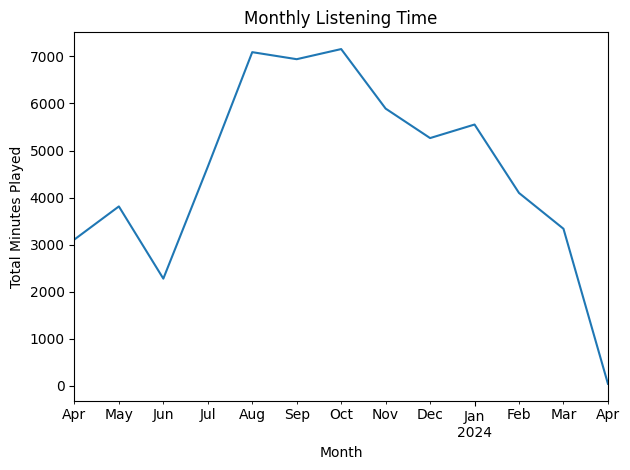

In [116]:
streaming_history_df.resample('M')['minutesPlayed'].sum().plot(title='Monthly Listening Time')
plt.ylabel('Total Minutes Played')
plt.xlabel('Month')
plt.tight_layout()


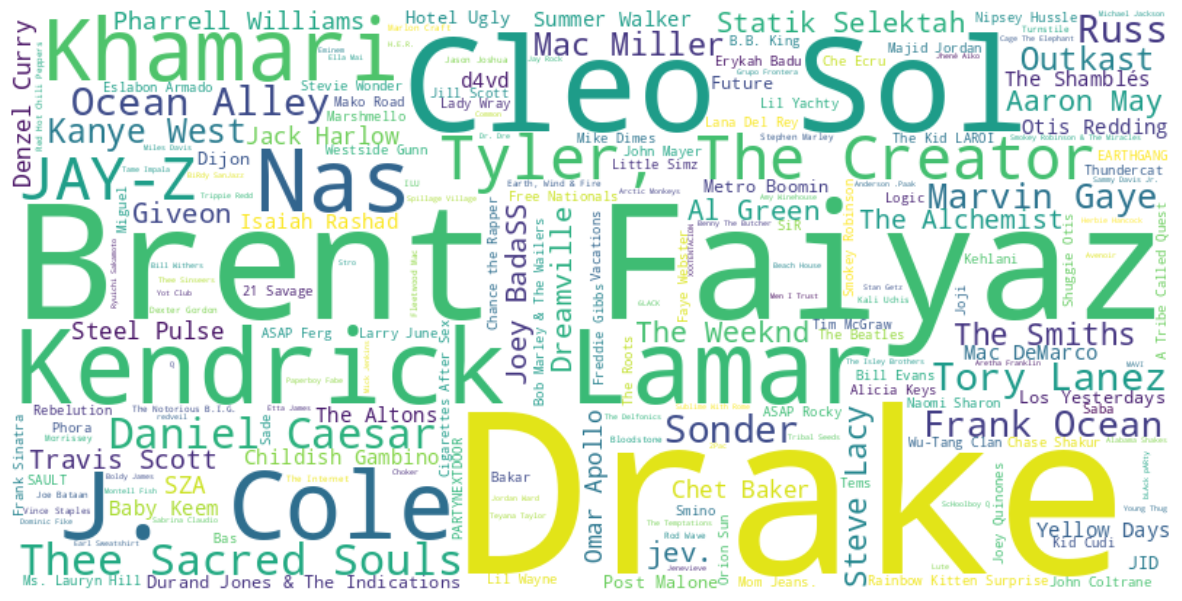

In [87]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(dict(zip(artist_listen_minutes.artistName, artist_listen_minutes.minutesPlayed)))

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# When would I listen to music?
Using a heatmap to show the listening activity by the week showing that I mostly listen at night after 3 

In [ ]:
# Converting streaming_history_df WeekDay column by UTC 0 starts on Monday
streaming_history_df['Weekday'] = streaming_history_df[day_of_week].list(0='Monday',1='Tuesday','Wednesday',5='Thursday',6='Friday',7='Saturday',8 ='Sunday')


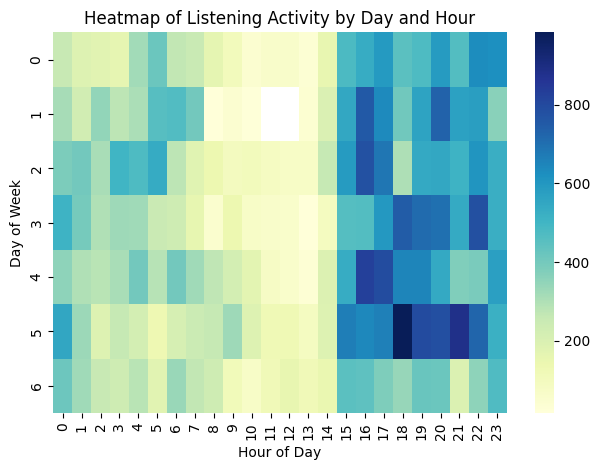

In [88]:

streaming_history_df['hour'] = streaming_history_df.index.hour

# Creating a pivot table
pivot_table = streaming_history_df.pivot_table(index='day_of_week', columns='hour', values='minutesPlayed', aggfunc='sum')

# Plotting
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Listening Activity by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()


In [89]:
streaming_history_df.head()

,artistName,trackName,msPlayed,minutesPlayed,year_month,day_of_week,hour
endTime,,,,,,,
2023-04-01 00:00:00,Brent Faiyaz,"GRAVITY (FEAT. TYLER, THE CREATOR)",2043,0.034050,2023-04,5,0
2023-04-01 00:00:00,Joey Bada$$,Head High,8498,0.141633,2023-04,5,0
2023-04-01 00:00:00,"Tyler, The Creator",Potato Salad,118750,1.979167,2023-04,5,0
2023-04-01 00:03:00,"Tyler, The Creator",STUNTMAN (feat. Vince Staples),188197,3.136617,2023-04,5,0
2023-04-01 00:04:00,"Tyler, The Creator","BOYFRIEND, GIRLFRIEND (2020 Demo) (feat. YG)",33459,0.557650,2023-04,5,0


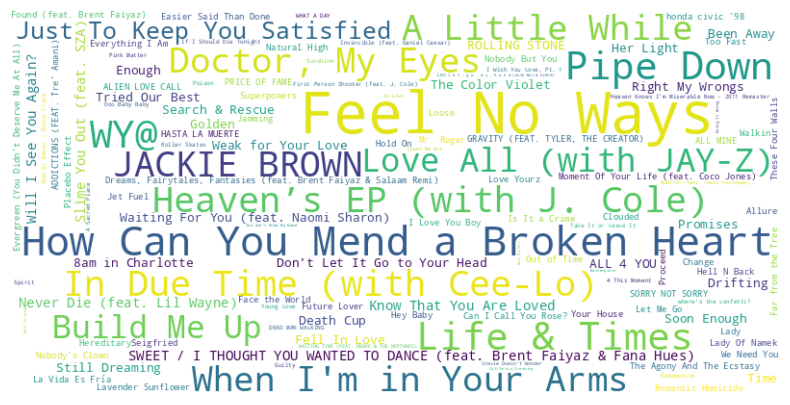

In [90]:
track_minutes = streaming_history_df.groupby('trackName')['minutesPlayed'].sum().reset_index()

# Convert into a dictionary: track names are keys, and total minutes played are values
track_dict = pd.Series(track_minutes.minutesPlayed.values, index=track_minutes.trackName).to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(track_dict)

# Wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()


In [ ]:
streaming_history_df['Weekday'] = streaming_history_df[day_of_week]day_of_week